Chapter 4 Exercises:

1. Which linear regression training algorithm can you use if you have a training set with millions of features?

  based on table 4-1 (page 149): 
    Normal Equation and SVD are slow for "large n" (features) so they would not work with millions of features.
    Normal Equation, SVD, and Batch GD do not have "out of core support" so they would not work with millions of features.
    That leaves: Stochastic GD and Mini-batch GD.

  1 book answer: If you have a training set with millions of features you can use Stochastic Gradient Descent or 
  Mini-batch Gradient Descent, and perhaps Batch Gradient Descent if the training set fits in memory. But you cannot 
  use the Normal Equation or the SVD approach because the computational complexity grows quickly (more than quadratically) 
  with the number of features.

2. Suppose the features in your training set have very different scalses. Which algorithms migh suffer from this and how?
   What can you do about it? 

  page 141: While the cost function has the shape of a bowl, it can be an elongated bowl if the features 
  have different scale. ... [the elongated bowl] It will eventually reach the minimum, but it will take a long time

  The note on page 141 states: "When using gradient descent, you should ensure that all features have
  similar scale (e.g. using Scikit-Learns StandardScaler class) or else it will take much longer to
  converge."

  The note on page 156 states: "It is important to scale the data (e.g. using StandardScaler) before preforming
  ridge regression, as it is sensitive to the scale of the input features. This is true of most regularized
  models
  -> thus, input scaling should also be used with LASSO Regression, Elastic Net Regression, and LogisticRegression


  2 book answer: If the features in your training set have very different scales, the cost function will have 
  the shape of an elongated bowl, so the Gradient Descent algorithms will take a long time to converge. To solve 
  this you should scale the data before training the model. Note that the Normal Equation or SVD approach will work 
  just fine without scaling. Moreover, regularized models may converge to a suboptimal solution if the features 
  are not scaled: since regularization penalizes large weights, features with smaller values will tend to be 
  ignored compared to features with larger values.

3. Can gradient descent algorithms get stuck in a local minimum when training a logistic regression model?

   -> No, because the MSE cost fucntion is a 'convex function'

   page 141: Fortunately, the MSE cost function for linear regression model [e.g. gradient descent] happens 
   to be a 'convex function' which means that if you pick any two points on the cureve, the segment joining 
   them is never below the curve.  This implies that here are no local minima , just a global minimum.

   page 166: But the good news is that this [logistic regression] cost function [log loss] is convex, so gradient
   descent (or any other algorithm is guaranteed to find the global minimum (if the learning rate is not too
   large and you wait long enough).

  3 book answer: Gradient Descent cannot get stuck in a local minimum when training a Logistic Regression model because 
  the cost function is convex. _Convex_ means that if you draw a straight line between any two points on the curve, 
  the line never crosses the curve.

4. Do all gradient descent algorithms lead to ths same model, provide you let them run long enough?

  page 144: [referencing figure 4-8] On the right, the learning rate is too high: the algorithm diverages, jumping
  all overthe place and actually getting further and further away from the solution at every step.

  page 145: [referencing stochastic Gradient Descent] Over time it will end of very close to the minimum, but
  once it gets there it will continue to bounce around never settling down (see Figure 4-9). Once the algorithm
  stops, the final parameter values will be good, but not optimal.

  page 148: The [mini-batch GD] algorithm's progress in parameter space is less erratic that with stochastic GD
  especially with fairly large mini-batches. As a result, mini-batch GD will end up walking a bit closer to the
  minimum that stochastic GD - but it may be harder for it to escape from local minima (in the case of problems
  that suffer from local minima, unlike linear regression with the MSE cost function).

  4 book answer: If the optimization problem is convex (such as Linear Regression or Logistic Regression), and 
  assuming the learning rate is not too high, then all Gradient Descent algorithms will approach the global optimum 
  and end up producing fairly similar models. However, unless you gradually reduce the learning rate, Stochastic GD 
  and Mini-batch GD will never truly converge; instead, they will keep jumping back and forth around the global optimum. 
  This means that even if you let them run for a very long time, these Gradient Descent algorithms will produce 
  slightly different models.

5. Suppose you use batch gradient descent and you plot the validation error at every epoch. If you notice
   that the validation error consistently goes up, what is likely going on? How can you fix it?

  page 144: [referencing figure 4-8] On the right, the learning rate is too high: the algorithm diverages, jumping
  all overthe place and actually getting further and further away from the solution at every step.
  -> if learning rate is too high, reduce the learning rate

  page 154: There is gap between the [validation error and training error] curves [in figure 4-16]. This means
  the model performs signficantly better on the validation data which is the hallmark of 'overfitting model'.

  5 book answer: If the validation error consistently goes up after every epoch, then one possibility is that the 
  learning rate is too high and the algorithm is diverging. If the training error also goes up, then this is clearly 
  the problem and you should reduce the learning rate. However, if the training error is not going up, then your 
  model is overfitting the training set and you should stop training.

6. Is it a good idea to stop minibatch gradient descent immediately when the validation error goes up?

   -> No, it may be bouncing around early on

  6 book answer: Due to their random nature, neither Stochastic Gradient Descent nor Mini-batch Gradient Descent 
  is guaranteed to make progress at every single training iteration. So if you immediately stop training when the 
  validation error goes up, you may stop much too early, before the optimum is reached. A better option is to save 
  the model at regular intervals; then, when it has not improved for a long time (meaning it will probably never 
  beat the record), you can revert to the best saved model.

7. Which gradient descent algorighm (among those we discussed) will reach the vicinitiy of the optimal solution the 
   fastest? Which will actually converge? How can you make the others converge as well?

   -> Stochistic GD will reach the vicinity of the optimal solution the fastest because it only calcuates on
   one instance at a time, but it will be a less optimal solution. With small mini-batch size, the mini-batch
   may provide similar performance.

  7 book answer: Stochastic Gradient Descent has the fastest training iteration since it considers only one training 
  instance at a time, so it is generally the first to reach the vicinity of the global optimum (or Mini-batch GD with 
  a very small mini-batch size). However, only Batch Gradient Descent will actually converge, given enough training time. 
  As mentioned, Stochastic GD and Mini-batch GD will bounce around the optimum, unless you gradually reduce the learning rate.

8. Suppose you are using Polynomial regressions. You plot the learning curves and you notice a large gap between
   the training error and the validation error. What is happening? What are three ways to solve this?

  page 154: There is gap between the [validation error and training error] curves [in figure 4-16]. This means
  the model performs signficantly better on the validation data which is the hallmark of 'overfitting model'.

  page 152: This high degree polynomial regression model is severely overfitting the training data while
  the linear model is underfitting it.

  -> The polynomial model degrees does fit the data. If it overfitting, then polynomial number of degrees needs
  to be reduced.

  page 156: Ridge regression (. . .) is regularized version of linear regression: a regulation term equal to
  [l2 equation shown] is added to the MSE. This forces the learning algorithm to not fit the data but also keep 
  the model weightsas small as possible. Note that the regularization term should only be added to the cost 
  function during training.

  page 158: Least Absolute shrinkage and selection operator regression (usually simply called LASSO regression)
  is another regularization term to the cost function, but it uses the l1 norm of the weight vector instead
  of the l2 norm.

  8 book answer: If the validation error is much higher than the training error, this is likely because your model 
  is overfitting the training set. One way to try to fix this is to reduce the polynomial degree: a model with fewer 
  degrees of freedom is less likely to overfit. Another thing you can try is to regularize the model-for example, by 
  adding an l2 penalty (Ridge) or an l1 penalty (Lasso) to the cost function. This will also reduce the degrees of 
  freedom of the model. Lastly, you can try to increase the size of the training set.

9. Suppose you are using ridge regression and you notice that the training error and the validation error are 
   almost equal and fairly high. Would you say tha the model suffers from high bias or high variance? Should 
   you increase the regularization hyperparameter 'alpha' or reduce it?

   -> Fairly equal and high training and validation error indicates unfitting the data which is 
      normally due to high bias. With Ridge Regression, you would reduce bias by increasing the 'alpha'. 
      (this conflicts with the book answer but note the book quotes)

   page 154: The learning curves are typical of a model that's underfitting. Both [validation errors &
   training errors] curves have reached a plaateau; they are close and fairly high.

   page 154: If your model is underfitting the training data, adding more training examples will not help. 
   You need to use a better model or come up with better features.

   page 155:
   Bias: 
     This part of the generalization error is due to wrong assumptions, such as assuming that the data is linear
     when it is acutally quadradtic. A 'high-bias' model is most likely to underfit the training data.
   Variance:
     This part is due to the model's excessive sensitivity to small variation in the training data. A model with
     with many degrees of freedom (such as a high-degree polynomial model) is likely to have high variance and 
     thus overfit the training data.
   Irreduciblw error:
     This part is due to the noiseness of the data itself. The only way to reduce this part of the error is 
     to clean up the data (e.g. fix the data sources, such as broken sensors, or detect and remove outliers

   page 157: Note how increaing [ridge regression] 'alpha' leads to flatter (i.e. less extreme, more reasonable
   predictions, thus reducing the model's variance, but increasing it its bias.

   9 book answer:  If both the training error and the validation error are almost equal and fairly high, the 
   model is likely underfitting the training set, which means it has a high bias. You should try reducing 
   the regularization hyperparameter 'alpha'.

10. Why would your want to use:
  a. Ridge regression instead plan linear regression (i.e. without any regularization)?
  b. Lasso instead of ridge regression.?
  c. Elastic net instead of lasso regression?

  -> Generally, Use Ridge Regression instead of plan linear regression since it is almost always preferable 
     to have at least a little bit of regularization, 
  -> Use Lasso (or net elastic) instead of ridge regression when only a few features are userful, because they 
     tend to reduce the useless features weights down to zero.
  -> In general, 'elastic net' is preferred over 'lasso' because lasso may behave erractically when the number 
     of features is greater than the number of training instances or when several features are strongly correlated.

  page 156: Ridge regression (. . .) is regularized version of linear regression: a regulation term equal to
  [l2 equation shown] is added to the MSE. This forces the learning algorithm to not fit the data but also keep 
  the model weightsas small as possible. Note that the regularization term should only be added to the cost 
  function during training.

  page 158: Least Absolute shrinkage and selection operator regression (usually simply called LASSO regression)
  is another regularization term to the cost function, but it uses the l1 norm of the weight vector instead
  of the l2 norm.

  page 159: An important characteristc of lasso regression is the it tends toe eliminate the weights of the 
  least import features (i.e. set them to zero). . . . In other words, lasso regression automatically performs 
  feature selection and outputs a sparse model with few nonzero feature weights

  page 161: Elastic regression is the middle ground between ridge regression and lasso regression. The 
  regularization is a weighted sum of both ridge and lasso's regularization terms, and you can control the 
  mix ratio 'r'. When r = 0, elastic net is equivalent to ridge regression, and when r = 1, it is equivalent 
  to lasso regression.

  page 161 - 162: So when should you use elastic net regression, or ridge, or lasso, or plan linear regression 
  (i.e. without any regularization)? It is almost always preferable to have at least a little bit of regularization, 
  so generally you should avoid plain linear regression. 'Ridge regression' is a good default, but if you suspect
  that only a few features are userful, you should prefer lasso or elastic net because they tend to reduce the
  useless features weights down to zero, as discussed earlier. In general, 'elastic net' is preferred over
  'lasso' because lasso may behave erractically when the number of features is greater than the number of 
  training instances or when several features are strongly correlated.

  10 book answers: Let's see:
     * A model with some regularization typically performs better than a model without any regularization, so you 
       should generally prefer Ridge Regression over plain Linear Regression.
     * Lasso Regression uses an l1 penalty, which tends to push the weights down to exactly zero. This leads to 
       sparse models, where all weights are zero except for the most important weights. This is a way to perform 
       feature selection automatically, which is good if you suspect that only a few features actually matter. 
       When you are not sure, you should prefer Ridge Regression.
     * Elastic Net is generally preferred over Lasso since Lasso may behave erratically in some cases (when several 
       features are strongly correlated or when there are more features than training instances). However, it does 
       add an extra hyperparameter to tune. If you want Lasso without the erratic behavior, you can just use 
       Elastic Net with an `l1_ratio` close to 1.

11. Suppose you want to classify pictures as outdoor/indoor and daytime/nightime. Should you implement two logistic
    regression classifiers or one softmax regression classifier?
    
   -> You should implement two logistic regression classifiers because softmax regression classifier predicts
      one class at a time, and the pictures could be two classes (e.g. outdoor and daytime)

   page 170: The logistic regression model can be generalized to support multiple classes directly without having
   to train and combine multiple binary classifiers (as discussed in Chapter 3). This is called softmax regression
   or multinominal logistic regression.

   The idea is simple: when give an instance 'x', the softmax regression first computes a score sk(x) for each 
   class 'k', then estimates the probability of each class by applying softmax function (also called normalized
   exponential) to the scores.

   page 171: The softmax regression classifier predicts only one class at a time (i.e. it is multiclass, not 
   multioutput) so it should be used only with mutually exclusive classes, such as different species of plants.
   You cannot use it to recognize multiple people in one picture.


  11 book answer: If you want to classify pictures as outdoor/indoor and daytime/nighttime, since these are not 
  exclusive classes (i.e., all four combinations are possible) you should train two Logistic Regression classifiers.

12. Implement batch gradient descent with early stopping for a softmax regression without using SciKit-Learn, 
    only NumnPY. Use it on a classification task such as the iris dataset.

In [21]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [22]:
print(iris.DESCR)  # extra code – it's a bit too long

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [23]:
iris.data.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [24]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Let's start by loading the data. 

In [25]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris["target"].values

We need to add the bias term for every instance ($x_0 = 1$). The easiest option to do this would be to use Scikit-Learn's `add_dummy_feature()` function, but the point of this exercise is to get a better understanding of the algorithms by implementing them manually. So here is one possible implementation:

In [26]:
import numpy as np
X_with_bias = np.c_[np.ones(len(X)), X]

The easiest option to split the dataset into a training set, a validation set and a test set would be to use Scikit-Learn's train_test_split() function, but again, we want to do it manually:

In [27]:
test_ratio = 0.2
validation_ratio = 0.2
total_size = len(X_with_bias)

test_size = int(total_size * test_ratio)
validation_size = int(total_size * validation_ratio)
train_size = total_size - test_size - validation_size
print(f'test_size: {test_size}   validation_size: {validation_size}    train_size: {train_size}')

np.random.seed(42)
rnd_indices = np.random.permutation(total_size)

X_train = X_with_bias[rnd_indices[:train_size]]
y_train = y[rnd_indices[:train_size]]
X_valid = X_with_bias[rnd_indices[train_size:-test_size]]
y_valid = y[rnd_indices[train_size:-test_size]]
X_test = X_with_bias[rnd_indices[-test_size:]]
y_test = y[rnd_indices[-test_size:]]

test_size: 30   validation_size: 30    train_size: 90


numpy.random.permutation
random.permutation(x)

Randomly permute a sequence, or return a permuted range.

The targets are currently class indices (0, 1 or 2), but we need target class probabilities to train the Softmax Regression model. Each instance will have target class probabilities equal to 0.0 for all classes except for the target class which will have a probability of 1.0 (in other words, the vector of class probabilities for any given instance is a one-hot vector). Let's write a small function to convert the vector of class indices into a matrix containing a one-hot vector for each instance. To understand this code, you need to know that np.diag(np.ones(n)) creates an n×n matrix full of 0s except for 1s on the main diagonal. Moreover, if 'a' is a NumPy array, then a[[1, 3, 2]] returns an array with 3 rows equal to a[1], a[3] and a[2] (this is advanced NumPy indexing).

In [28]:
def to_one_hot(y):
    return np.diag(np.ones(y.max() + 1))[y]

Let's test this function on the first 10 instances:

In [29]:
y_train[:10]

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1])

In [30]:
to_one_hot(y_train[:10])

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [31]:
exarr = np.diag(np.ones(y_train.max() + 1))
#exarr[y_train[:10]]
exarr

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

Looks good, so let's create the target class probabilities matrix for the training set and the test set:

In [32]:
Y_train_one_hot = to_one_hot(y_train)
Y_valid_one_hot = to_one_hot(y_valid)
Y_test_one_hot = to_one_hot(y_test)

Now let's scale the inputs. We compute the mean and standard deviation of each feature on the training set (except for the bias feature), then we center and scale each feature in the training set, the validation set, and the test set:

In [33]:
mean = X_train[:, 1:].mean(axis=0)
std = X_train[:, 1:].std(axis=0)
X_train[:, 1:] = (X_train[:, 1:] - mean) / std
X_valid[:, 1:] = (X_valid[:, 1:] - mean) / std
X_test[:, 1:] = (X_test[:, 1:] - mean) / std

Now let's implement the Softmax function. Recall that it is defined by the following equation:

σ(s(x))κ = exp(sκ(x)) / Σ exp (sj(x))

In [34]:
def softmax(logits):
    exps = np.exp(logits)
    exp_sums = exps.sum(axis=1, keepdims=True)
    return exps / exp_sums

We are almost ready to start training. Let's define the number of inputs and outputs:

In [35]:
n_inputs = X_train.shape[1]  # == 3 (2 features plus the bias term)
n_outputs = len(np.unique(y_train))  # == 3 (there are 3 iris classes)
print(f'n_inputs: {n_inputs}   n_outputs: {n_outputs}')

n_inputs: 3   n_outputs: 3


Now here comes the hardest part: training! Theoretically, it's simple: it's just a matter of translating the math equations into Python code. But in practice, it can be quite tricky: in particular, it's easy to mix up the order of the terms, or the indices. You can even end up with code that looks like it's working but is actually not computing exactly the right thing. When unsure, you should write down the shape of each term in the equation and make sure the corresponding terms in your code match closely. It can also help to evaluate each term independently and print them out. The good news it that you won't have to do this everyday, since all this is well implemented by Scikit-Learn, but it will help you understand what's going on under the hood.

So the equations we will need are the cost function:

J(Θ) = (1/m) Σ Σ yk(i) log(pcapk(i))

And the equation for the gradients:

Δθ(k) J(Θ) = (1/m) Σ (pcapk(i) - yk(i))xi

Note that log (pcapk(i)) may not be computable if pcapk(i) = 0.  So we will add a tiny value to avoid getting 'nan' values.

In [50]:
eta = 0.5
n_epochs = 5001
m = len(X_train)
epsilon = 1e-5

np.random.seed(42)
Theta = np.random.randn(n_inputs, n_outputs)

for epoch in range(n_epochs):
    # calculate the softmax socres for each class (equation 4-19)
    logits = X_train @ Theta
    # calculate the softmax estimated probabilities (equation 4-20)
    Y_proba = softmax(logits)
    if epoch % 1000 == 0:
        Y_proba_valid = softmax(X_valid @ Theta)
        # calculate the Cost entropy cost function (equation 4-22)
        xentropy_losses = -(Y_valid_one_hot * np.log(Y_proba_valid + epsilon))
        print(epoch, xentropy_losses.sum(axis=1).mean())
    # calculate the error part of the of equation 4-23 (( \hat{p}^{(i)}_k - y_k^{(i))
    error = Y_proba - Y_train_one_hot
    # calculate the Cross entropy gradient vector (equation 4-23)
    gradients = 1 / m * X_train.T @ error
    # use the learning rate, eta, to calculate the next Theta
    Theta = Theta - eta * gradients

0 3.7085808486476917
1000 0.1451936748083065
2000 0.1301309575504088
3000 0.12009639326384533
4000 0.11372961364786881
5000 0.11002459532472425


In [52]:
Theta

array([[ 0.41931626,  6.11112089, -5.52429876],
       [-6.53054533, -0.74608616,  8.33137102],
       [-5.28115784,  0.25152675,  6.90680425]])

Let's make predictions for the validation set and check the accuracy score:

In [53]:
logits = X_valid @ Theta
Y_proba = softmax(logits)
y_predict = Y_proba.argmax(axis=1)

accuracy_score = (y_predict == y_valid).mean()
accuracy_score

0.9333333333333333

Well, this model looks pretty ok. For the sake of the exercise, let's add a bit of $\ell_2$ regularization. The following training code is similar to the one above, but the loss now has an additional $\ell_2$ penalty, and the gradients have the proper additional term (note that we don't regularize the first element of `Theta` since this corresponds to the bias term). Also, let's try increasing the learning rate `eta`.

In [54]:
X_train.shape

(90, 3)

In [55]:
eta = 0.5
n_epochs = 5001
m = len(X_train)
epsilon = 1e-5
alpha = 0.01  # regularization hyperparameter

np.random.seed(42)
Theta = np.random.randn(n_inputs, n_outputs)

for epoch in range(n_epochs):
    logits = X_train @ Theta
    Y_proba = softmax(logits)
    if epoch % 1000 == 0:
        Y_proba_valid = softmax(X_valid @ Theta)
        xentropy_losses = -(Y_valid_one_hot * np.log(Y_proba_valid + epsilon))
        l2_loss = 1 / 2 * (Theta[1:] ** 2).sum()
        total_loss = xentropy_losses.sum(axis=1).mean() + alpha * l2_loss
        print(epoch, total_loss.round(4))
    error = Y_proba - Y_train_one_hot
    gradients = 1 / m * X_train.T @ error
    gradients += np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients

0 3.7372
1000 0.3259
2000 0.3259
3000 0.3259
4000 0.3259
5000 0.3259


numpy.r_
numpy.r_ = <numpy.lib.index_tricks.RClass object>

Translates slice objects to concatenation along the first axis. [add rows]

Because of the additional l2 penalty, the loss seems greater than earlier, but perhaps this model will perform better? Let's find out:

In [117]:
logits = X_valid @ Theta
Y_proba = softmax(logits)
y_predict = Y_proba.argmax(axis=1)

accuracy_score = (y_predict == y_valid).mean()
accuracy_score

0.9333333333333333

In this case, the 'l2' penalty did not change the test accuracy. Perhaps try fine-tuning 'alpha'?

Now let's add early stopping. For this we just need to measure the loss on the validation set at every iteration and stop when the error starts growing.


In [118]:
eta = 0.5
n_epochs = 50_001
m = len(X_train)
epsilon = 1e-5
C = 100  # regularization hyperparameter
best_loss = np.infty

np.random.seed(42)
Theta = np.random.randn(n_inputs, n_outputs)

for epoch in range(n_epochs):
    logits = X_train @ Theta
    Y_proba = softmax(logits)
    Y_proba_valid = softmax(X_valid @ Theta)
    xentropy_losses = -(Y_valid_one_hot * np.log(Y_proba_valid + epsilon))
    l2_loss = 1 / 2 * (Theta[1:] ** 2).sum()
    total_loss = xentropy_losses.sum(axis=1).mean() + 1 / C * l2_loss
    if epoch % 1000 == 0:
        print(epoch, total_loss.round(4))
    if total_loss < best_loss:
        best_loss = total_loss
    else:
        print(epoch - 1, best_loss.round(4))
        print(epoch, total_loss.round(4), "early stopping!")
        break
    error = Y_proba - Y_train_one_hot
    gradients = 1 / m * X_train.T @ error
    gradients += np.r_[np.zeros([1, n_outputs]), 1 / C * Theta[1:]]
    Theta = Theta - eta * gradients

0 3.7372
281 0.3256
282 0.3256 early stopping!


Oh well, still no change in validation accuracy, but at least early stopping shortened training a bit.

In [121]:
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

Now let's plot the model's predictions on the whole dataset (remember to scale all features fed to the model):

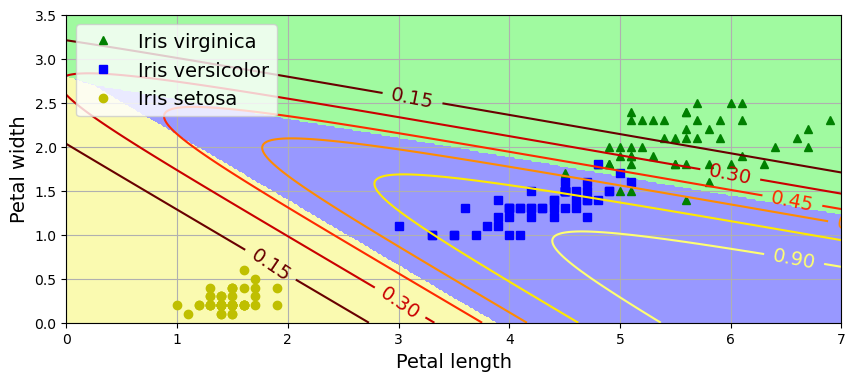

In [122]:
custom_cmap = mpl.colors.ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])

x0, x1 = np.meshgrid(np.linspace(0, 8, 500).reshape(-1, 1),
                     np.linspace(0, 3.5, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]
X_new = (X_new - mean) / std
X_new_with_bias = np.c_[np.ones(len(X_new)), X_new]

logits = X_new_with_bias @ Theta
Y_proba = softmax(logits)
y_predict = Y_proba.argmax(axis=1)

zz1 = Y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y == 2, 0], X[y == 2, 1], "g^", label="Iris virginica")
plt.plot(X[y == 1, 0], X[y == 1, 1], "bs", label="Iris versicolor")
plt.plot(X[y == 0, 0], X[y == 0, 1], "yo", label="Iris setosa")

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap="hot")
plt.clabel(contour, inline=1)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.axis([0, 7, 0, 3.5])
plt.grid()
plt.show()

And now let's measure the final model's accuracy on the test set:

In [123]:
logits = X_test @ Theta
Y_proba = softmax(logits)
y_predict = Y_proba.argmax(axis=1)

accuracy_score = (y_predict == y_test).mean()
accuracy_score

0.9666666666666667

Well we get even better performance on the test set. This variability is likely due to the very small size of the dataset: depending on how you sample the training set, validation set and the test set, you can get quite different results. Try changing the random seed and running the code again a few times, you will see that the results will vary.